In [4]:
%load_ext autoreload
%autoreload 2

from plot_utils import pull_data, plot_2x2_avg
from run import ScriptArguments
from copy import deepcopy

def get_key(config):
    return (config.model_name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
api = 'anthropic'
seed_list = range(1)
model_name_list = ['claude-3-5-sonnet-20240620']
athropic_arg_list = []
for seed in seed_list:
    for model_name in model_name_list:
        athropic_arg_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, 10],
                x_range=[0, 1000],
                input_dim=3,
                pz_end=1000,
                pz_start=2,
                pz_dist='uniform',
                pz_count=50,
                num_test_examples=30,
                device='cuda:1',
                dataset_type='default'
            )
        )

api = 'baseline'
seed_list = range(1)
model_name_list = ['KNN']
knn_args_list = []
for seed in seed_list:
    for model_name in model_name_list:
        knn_args_list.append(
            ScriptArguments(
                debug=False,
                api=api,
                seed=seed,
                model_name=model_name,
                w_range=[0, 10],
                x_range=[0, 1000],
                input_dim=3,
                pz_end=1000,
                pz_start=2,
                pz_dist='uniform',
                pz_count=100,
                num_test_examples=100,
                device='cuda:1',
                dataset_type='default'
            )
        )

## Default

e120f540edb660b1
af09d695d41a929b
9888aa4845b0c69e
0e48a0171666186f


/home/zcai75/github/multiple-ascent/plot_utils.py:75: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  dat_var = dat.flatten(0, 1).var(dim=0)


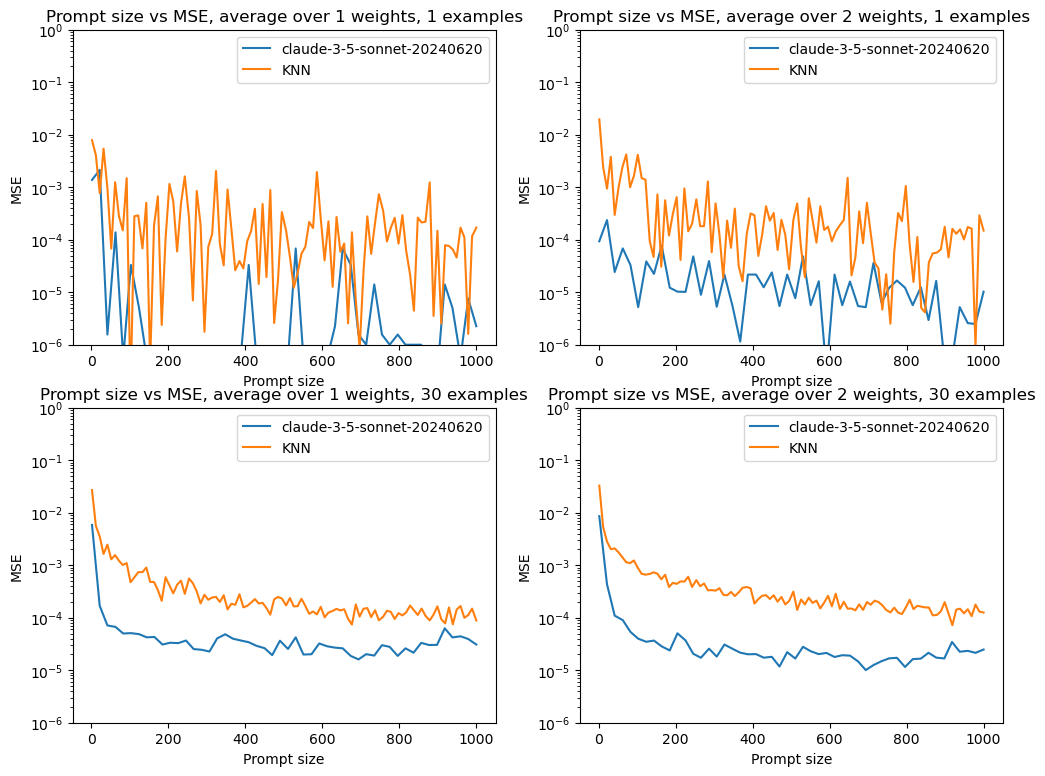

In [6]:
all_arg_list = deepcopy(athropic_arg_list + knn_args_list)
# for arg in all_arg_list:
#     arg.num_test_examples = 30

results, configs = pull_data(all_arg_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 30], w_list=[1, 2], logy=True, logx=False, decompose_mse=False)

## Shuffle

9cc5652f250193f9
2d53d12396b8089a
fb5b156421f1d6be
5032b0d163ca0ec3


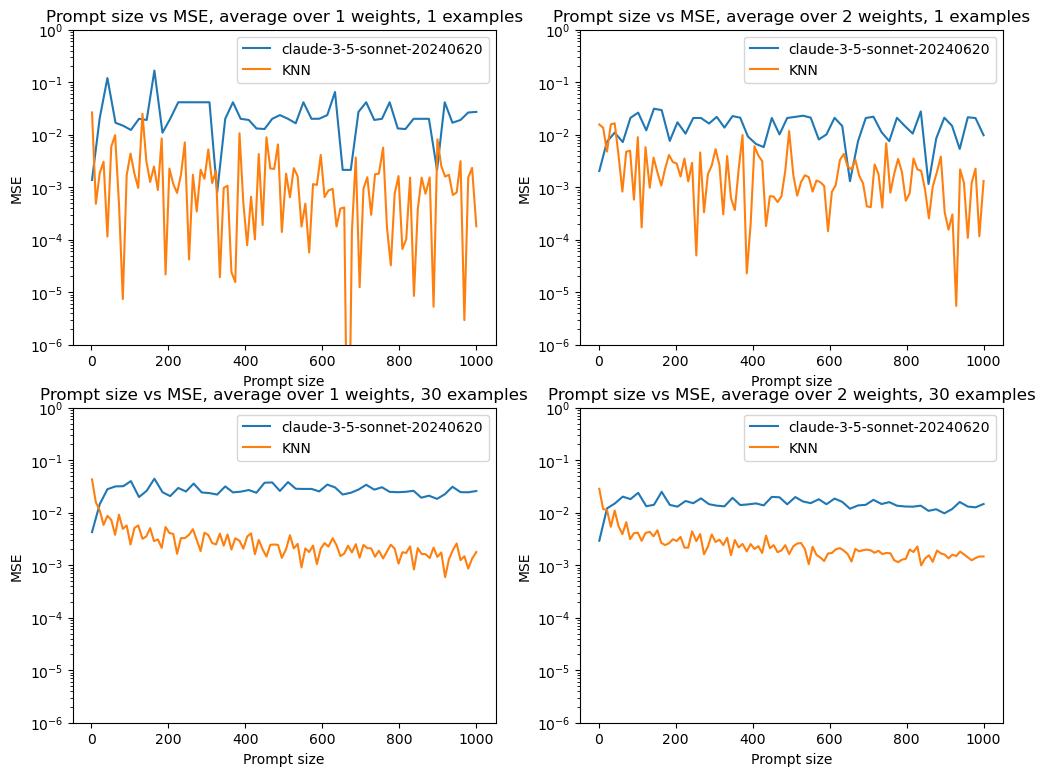

In [7]:
all_arg_list = deepcopy(athropic_arg_list + knn_args_list)
for arg in all_arg_list:
    arg.dataset_type = 'shuffle'

results, configs = pull_data(all_arg_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 30], w_list=[1, 2], logy=True, logx=False, decompose_mse=False)


## Small input preturbation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8c27071923187afa
8cffe18ac1c88296
Not enough data for claude-3-5-sonnet-20240620: 1 out of 2 weights, 0 out of 1 examples
Not enough data for KNN: 1 out of 2 weights, 0 out of 1 examples
Not enough data for claude-3-5-sonnet-20240620: 1 out of 2 weights, 0 out of 30 examples
Not enough data for KNN: 1 out of 2 weights, 0 out of 30 examples


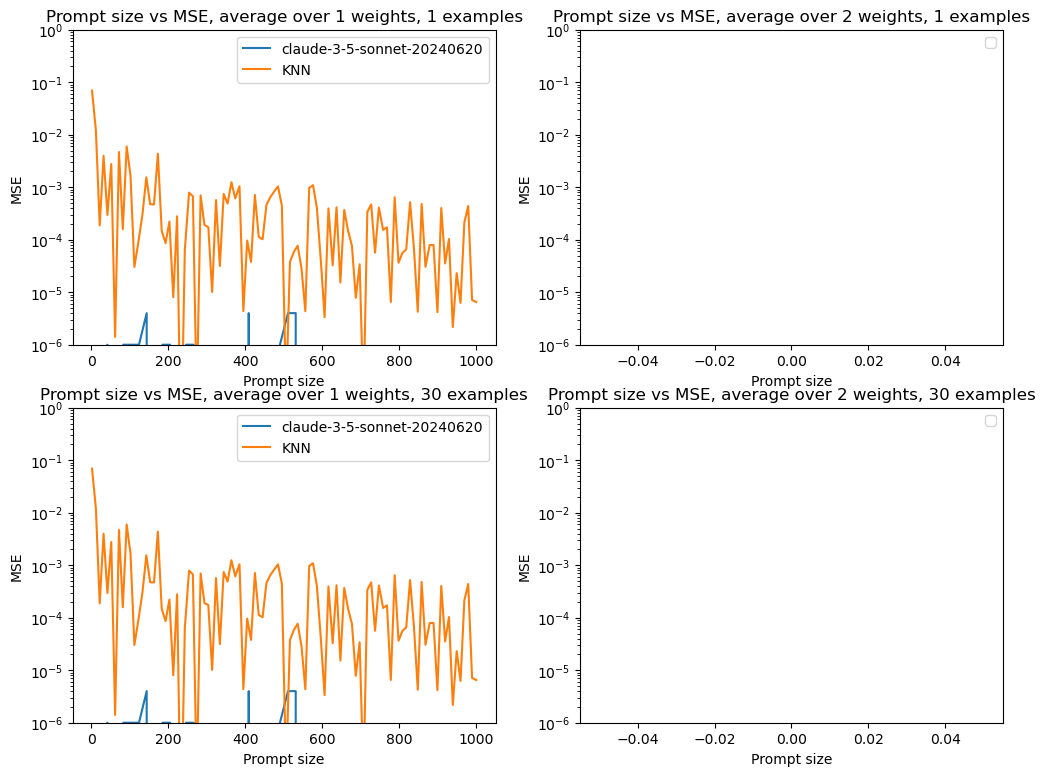

In [22]:
all_arg_list = deepcopy(athropic_arg_list + knn_args_list)
for arg in all_arg_list:
    arg.dataset_type = 'perturb-input'
    arg.test_x_range = [495, 505]

results, configs = pull_data(all_arg_list, get_key)
plot_2x2_avg(results, configs, x_list=[1, 30], w_list=[1, 2], logy=True, logx=False, decompose_mse=False)
